# Domanda 11

Discutere la minimizzazione della funzione quadratica:

$$f(x, y) = 3(x − 2)^2 + (y − 1)2$$ 

(che ha un minimo globale in (2, 1)) utilizzando il metodo del gradiente con passo sia fisso che variabile calcolato con algoritmo di backtracking. 

Discutere i grafici dell’errore, del valore della funzione e della norma del gradiente al variare delle iterazioni.

In [17]:
import numpy as np
import matplotlib.pyplot as plt


def next_step(x,grad):
  alpha=1.1
  rho = 0.5
  c1 = 0.25 
  p=-grad
  j=0
  jmax=10
  while ((f(x+alpha*p) > f(x)+c1*alpha*np.dot(grad,p)) and j<jmax ):
    alpha= rho*alpha
    j+=1
  if (j>jmax):
    return -1
  else:
    print('alpha=',alpha)
    return alpha



def minimize(f,grad_f,x0,step,maxit,tol,xTrue,fixed=True): 
 
  x_list=np.zeros((2,maxit+1))

  
  norm_grad_list=np.zeros(maxit+1)
  function_eval_list=np.zeros(maxit+1)
  error_list=np.zeros(maxit+1)
  
 
  x_last = x0

  x_list[:,0] = x_last
  
  k=0

  function_eval_list[k]=f(x0)
  error_list[k]=np.linalg.norm(x_last-xTrue)
  norm_grad_list[k]=np.linalg.norm(grad_f(x0))

  while (np.linalg.norm(grad_f(x_last))>tol and k < maxit ):
    k=k+1
    grad = grad_f(x_last)
    
    
    if fixed:
        
        step = step
    else:
        
        step = next_step(x_last, grad)
    
    if(step==-1):
      print('non convergente')
      return (k) 
    
    x_last = x_last-step*grad
    
    x_list[:,k] = x_last

    function_eval_list[k]=f(x_last)
    error_list[k]=np.linalg.norm(x_last-xTrue)
    norm_grad_list[k]=np.linalg.norm(grad_f(x_last))

  function_eval_list = function_eval_list[:k+1]
  error_list = error_list[:k+1]
  norm_grad_list = norm_grad_list[:k+1]
  
  print('iterations=',k, '\n')
  print('last guess: x=(%f,%f)'%(x_list[0,k],x_list[1,k]), '\n')
 
  return (x_last,norm_grad_list, function_eval_list, error_list, x_list, k)

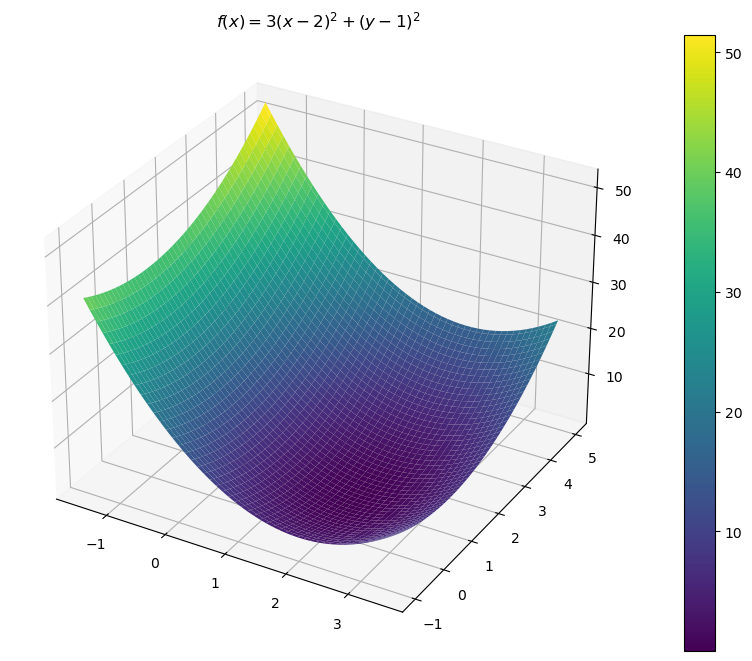

In [18]:
def f(vec):
    x, y = vec
    fout = 3*(x-2)**2+(y-1)**2
    return fout


def grad_f(vec):
    x, y = vec
    dfdx = 6*(x-2)
    dfdy = 2*(y-1)
    return np.array([dfdx,dfdy])

x = np.linspace(-1.5,3.5)
y = np.linspace(-1,5,100)

X, Y = np.meshgrid(x, y)
vec = np.array([X,Y])
Z=f(vec)

fig = plt.figure(figsize=(15, 8))

ax = plt.axes(projection='3d')
ax.set_title('$f(x)=3(x-2)^2 + (y-1)^2$')

s = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(s)
plt.show()


iterations= 100 

last guess: x=(2.000000,1.000957) 

alpha= 0.275
alpha= 0.275
alpha= 0.275
alpha= 0.275
alpha= 0.1375
alpha= 0.275
alpha= 0.275
alpha= 0.275
alpha= 0.275
alpha= 0.1375
alpha= 0.275
alpha= 0.275
alpha= 0.275
alpha= 0.275
alpha= 0.1375
alpha= 0.275
alpha= 0.275
alpha= 0.275
alpha= 0.1375
alpha= 0.275
iterations= 20 

last guess: x=(2.000001,1.000003) 



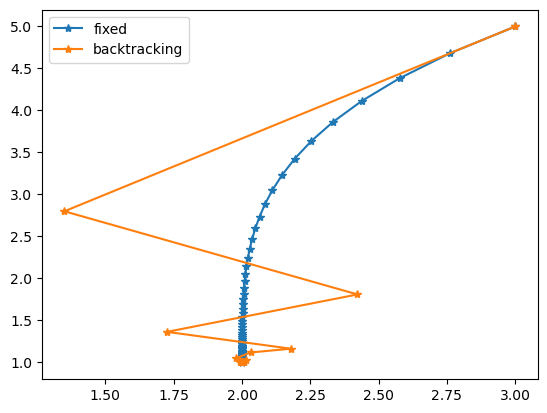

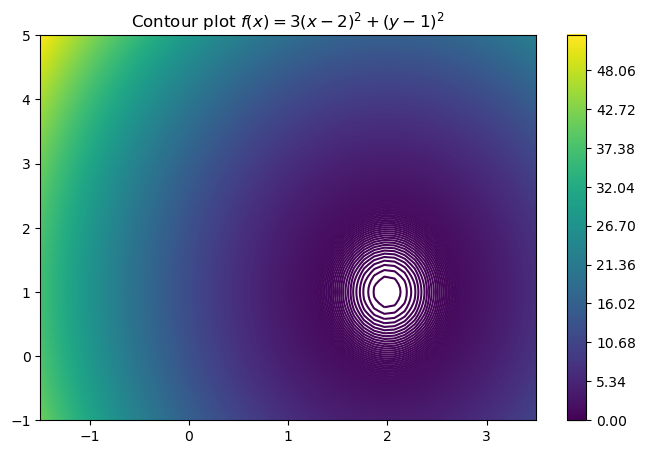

In [19]:
step = 0.04
maxitS=100
tol=1.e-5
x0 = np.array([3,5])
xTrue = np.array([2,1])

(x_last,norm_grad_listf, function_eval_listf, error_listf, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=True)
plt.plot(xlist[0,:k],xlist[1,:k],'*-')

(x_last,norm_grad_list, function_eval_list, error_list, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=False)
plt.plot(xlist[0,:k],xlist[1,:k],'*-')
plt.legend(['fixed', 'backtracking'])

fig = plt.figure(figsize=(8, 5))
contours = plt.contour(X, Y, Z, levels=1000)
plt.title('Contour plot $f(x)=3(x-2)^2 + (y-1)^2$')
fig.colorbar(contours)

plt.show()


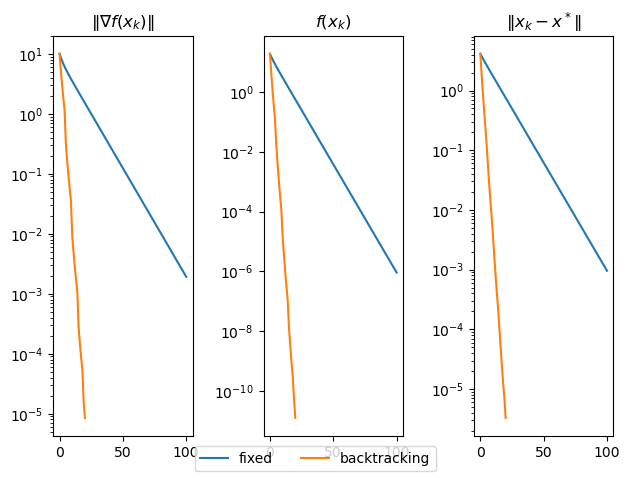

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.semilogy(norm_grad_listf)
ax1.semilogy(norm_grad_list)
ax1.set_title('$\|\\nabla f(x_k)\|$')
ax2.semilogy(function_eval_listf)
ax2.semilogy(function_eval_list)
ax2.set_title('$f(x_k)$')
ax3.semilogy(error_listf)
ax3.semilogy(error_list)
ax3.set_title('$\|x_k-x^*\|$')
fig.tight_layout()
fig.legend(['fixed', 'backtracking'], loc='lower center', ncol=4)
plt.show()